In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [93]:
df=pd.read_csv('houseprices_cleaned.csv',header=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   locality        225 non-null    object
 1   area            225 non-null    int64 
 2   rent            225 non-null    int64 
 3   price_per_sqft  225 non-null    int64 
 4   facing          206 non-null    object
 5   BHK             225 non-null    int64 
 6   bathrooms       225 non-null    int64 
 7   parking         217 non-null    object
dtypes: int64(5), object(3)
memory usage: 14.2+ KB


In [94]:
print(df['locality'].unique())
print(df['facing'].unique())
print(df['parking'].unique())

['BTM Layout' 'Attibele' 'K R Puram ' 'Marathahalli' 'Indiranagar'
 'Electronic City' 'Yalahanka' 'Malleshwaram' 'Jayanagar']
['North-West' 'East' 'North' 'West' 'North-East' 'South-East' 'South' nan]
['Bike' 'Bike and Car' 'Car' nan]


In [95]:
categorical_features = ['locality', 'facing', 'parking']
numerical_features = ['area', 'BHK', 'bathrooms', 'price_per_sqft']

In [96]:
df_encoded=pd.get_dummies(df, columns=['locality','facing','parking'],drop_first=True)
df_encoded.head()

,area,rent,price_per_sqft,BHK,bathrooms,locality_BTM Layout,locality_Electronic City,locality_Indiranagar,locality_Jayanagar,locality_K R Puram,...,locality_Marathahalli,locality_Yalahanka,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_West,parking_Bike and Car,parking_Car
0,565,20060,6195,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1837,97434,9254,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1280,54448,7422,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2220,117000,9234,3,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1113,34388,5391,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
X = df_encoded.drop('rent', axis=1)
y = df_encoded['rent']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

print(y_predict)

[105651.62595007  96450.25313014  42936.69771351  99520.96865288
  40545.67818592 160488.24559944 110195.87576196  55420.68649583
  38930.62185871 267879.73832429  36983.8184997   74436.46277202
 203643.58904953  26906.74787772   1999.6975869   79219.26203644
  49384.01526349 110223.51042639 164870.39803281  90032.13596332
  47315.36049533   4097.88986381  54806.42951808  74712.89183417
  44599.10514369  17283.53337358  48008.50140087  31259.97121938
  53574.65312045  81684.7176501   46600.66040332 231571.37023703
  22418.27549407  35346.15584977  86507.22955671  84454.97606778
  61931.24900399 114060.27244857  83353.63372875  21292.59353492
  29018.52825629 102247.9797718    5270.63982053  89376.15852851
  19856.88532048]


In [102]:
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 547348796.1322742
R^2 Score: 0.834784000991305


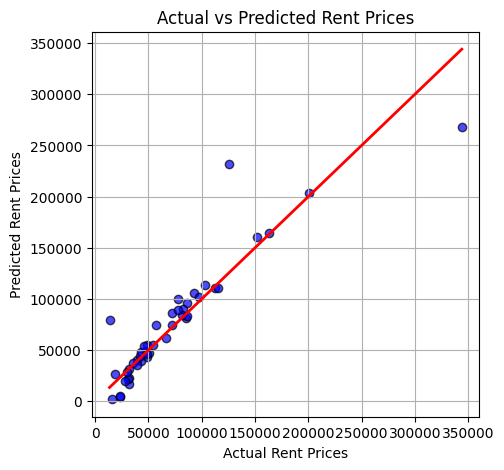

In [114]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.title('Actual vs Predicted Rent Prices')
plt.grid(True)
plt.show()

### Random Forest


In [103]:
rf_model=RandomForestRegressor()

rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)

print(y_pred)

[ 87509.36 103833.19  45563.81  69759.37  39568.14 156500.   116883.24
  46665.05  46017.2  286662.11  35770.42  70816.52 175116.43  14095.48
  14864.06  54756.34  45878.63 114457.45 123484.4   83421.55  49163.94
  23899.56  50768.38  53696.59  42938.16  32076.72  51038.17  31564.9
  48471.72  87797.39  50849.17 216636.07  32880.14  43271.88  72619.92
  82811.46  68988.61 101613.43  81975.15  27995.41  27736.26 107165.02
  24722.13  74006.09  29762.79]


# EDA

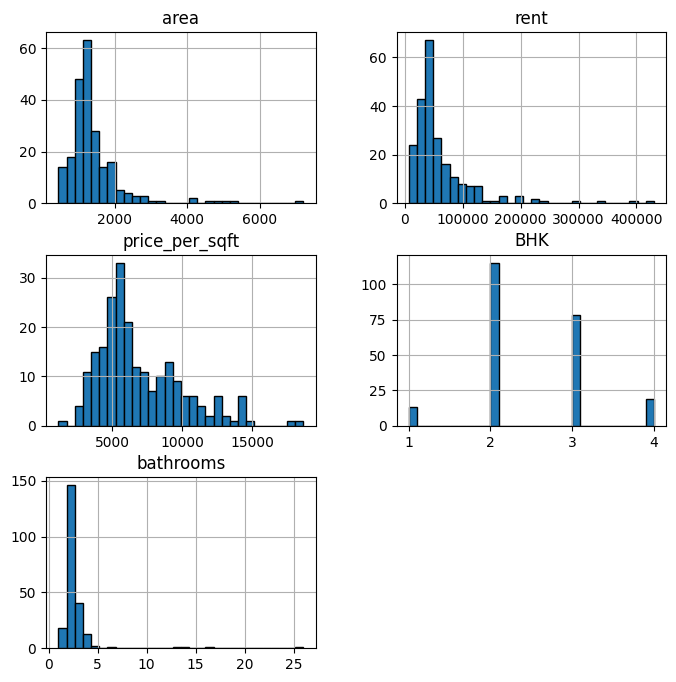

In [104]:
# Data distribution
numerical_features = ['area', 'rent', 'price_per_sqft', 'BHK', 'bathrooms']
df[numerical_features].hist(figsize=(8, 8), bins=30, edgecolor='black')
plt.show()

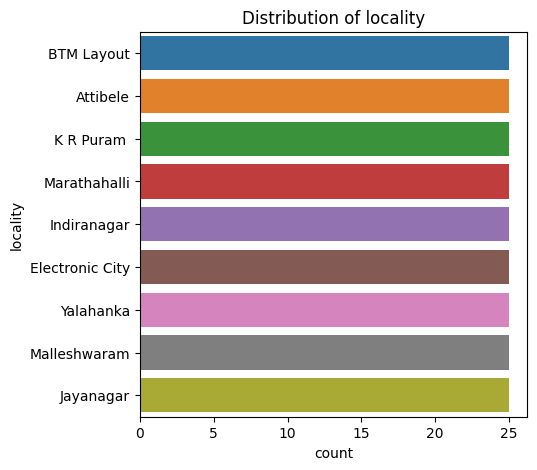

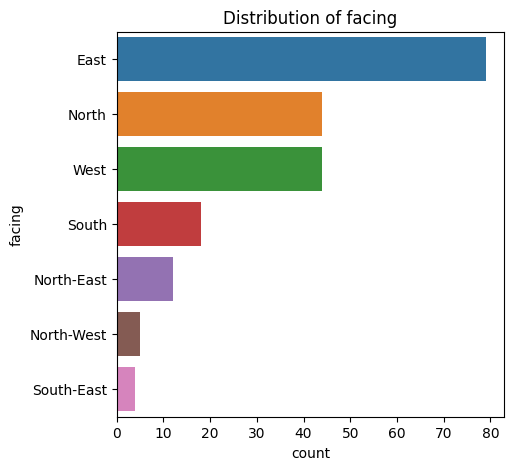

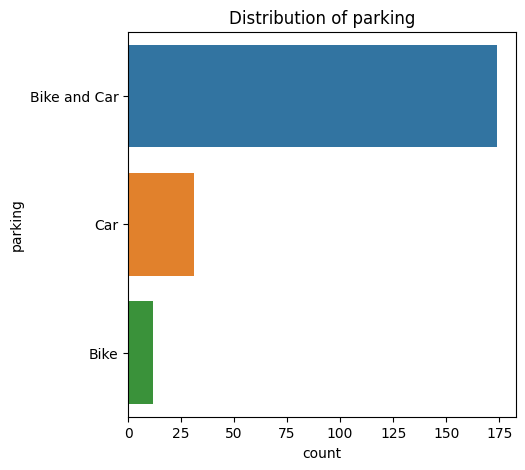

In [105]:
#Categorical Data Analysis
categorical_features=['locality','facing','parking']
for feature in categorical_features:
    plt.figure(figsize=(5,5))
    sns.countplot(y=df[feature],order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

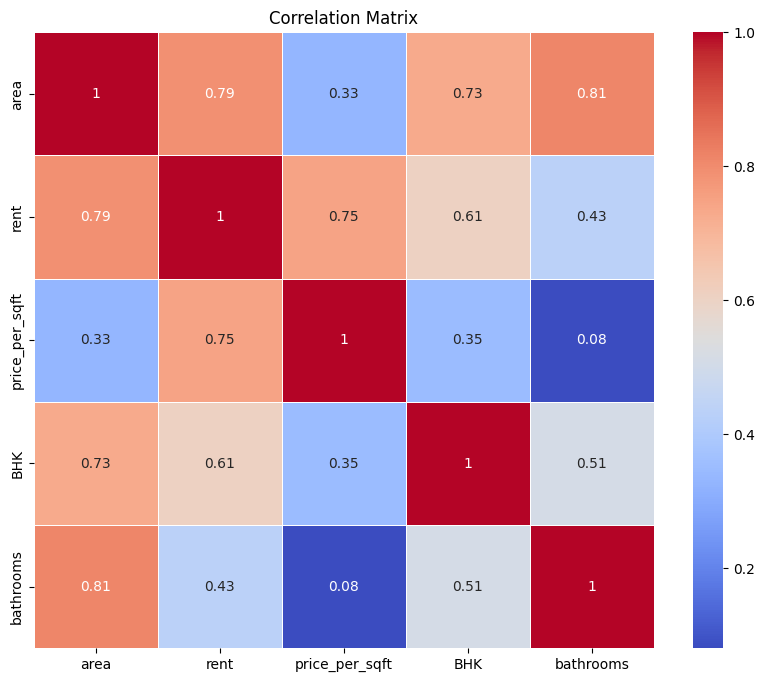

In [106]:
#Correlation Analysis
correlation_matrix=df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Relationship Between Variables

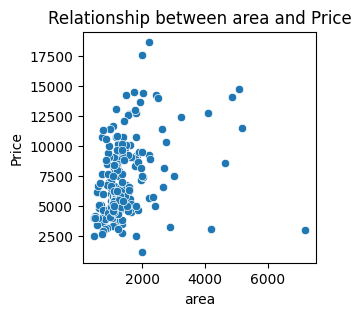

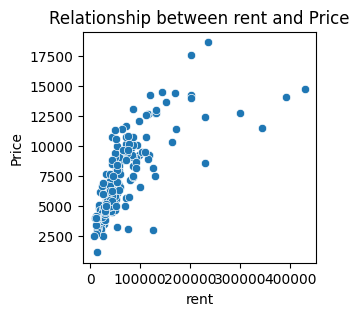

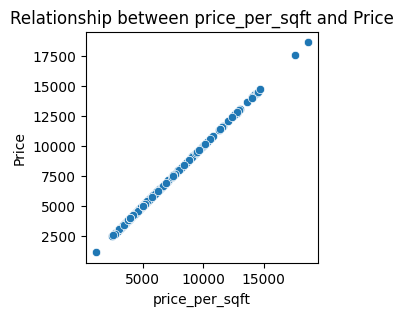

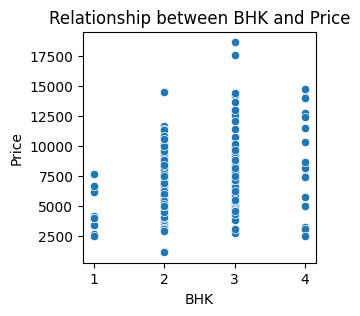

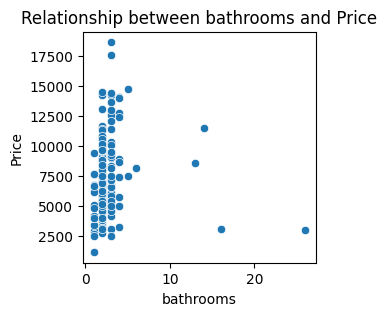

In [107]:
for feature in numerical_features:
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x=df[feature], y=df['price_per_sqft'])
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

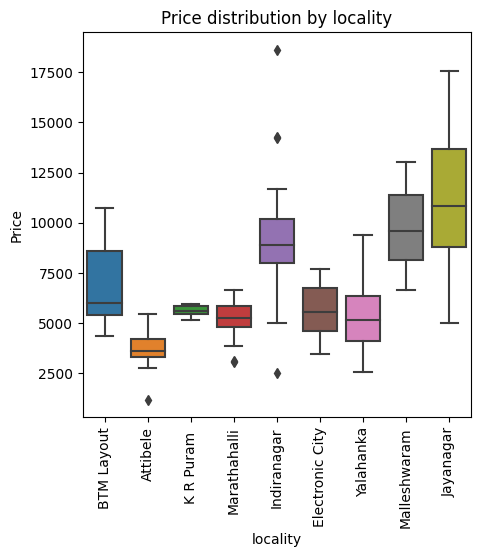

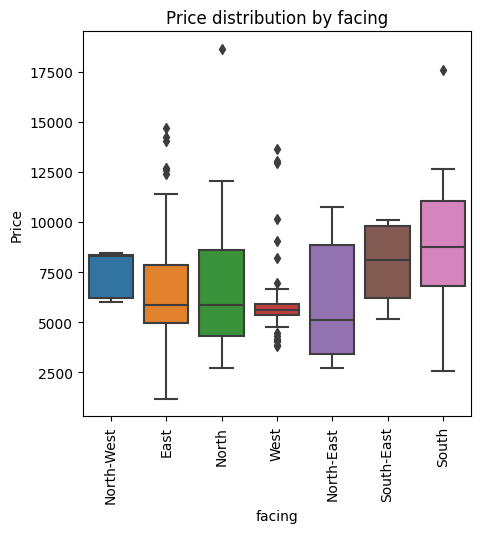

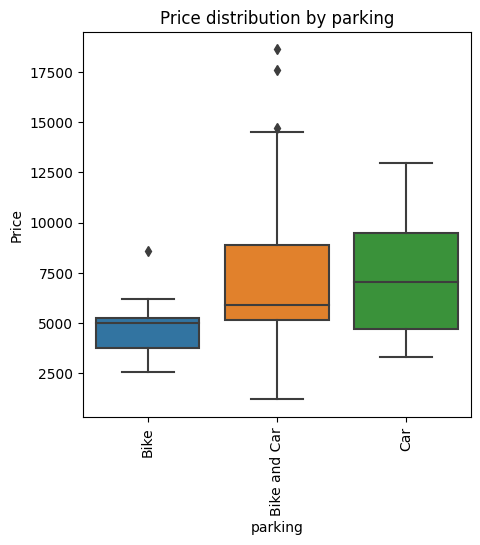

In [108]:
#Box plot
for feature in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[feature], y=df['price_per_sqft'])
    plt.title(f'Price distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()


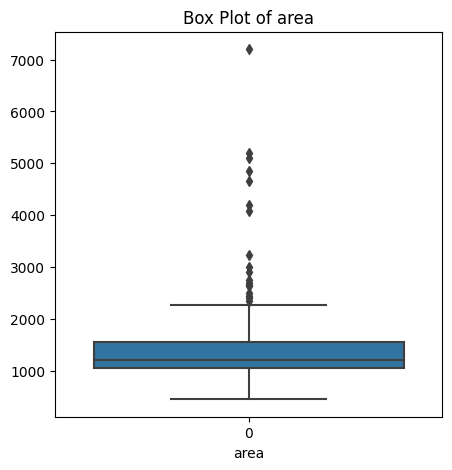

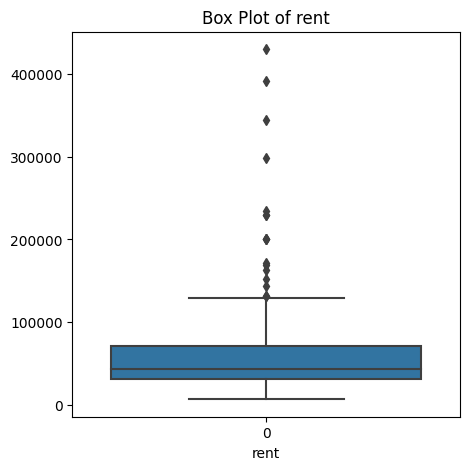

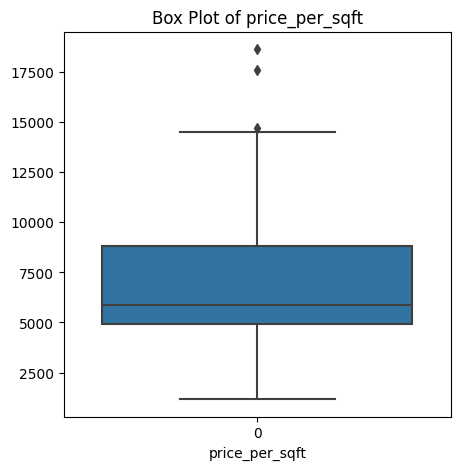

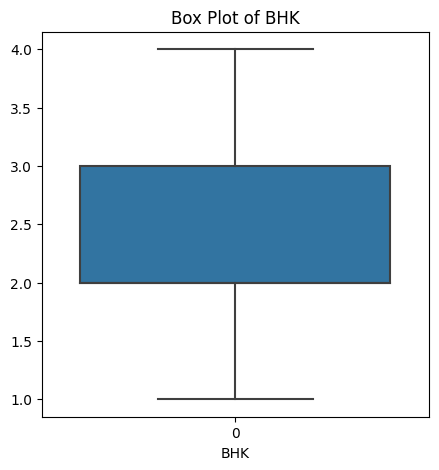

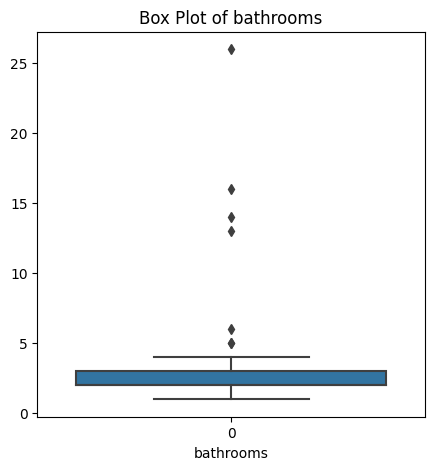

In [109]:
# Box plots
for feature in numerical_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

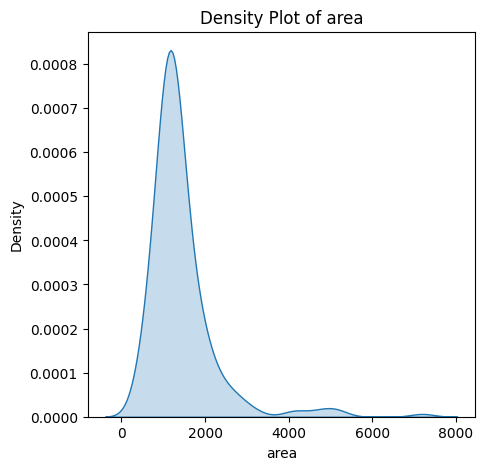

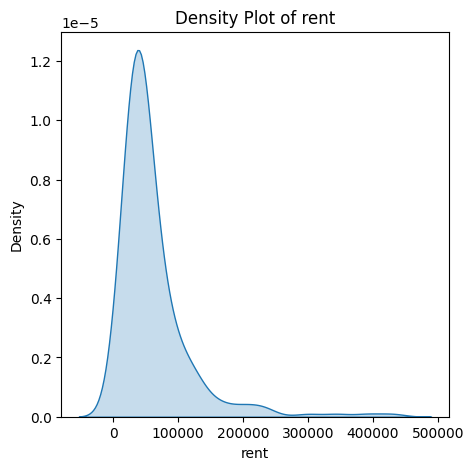

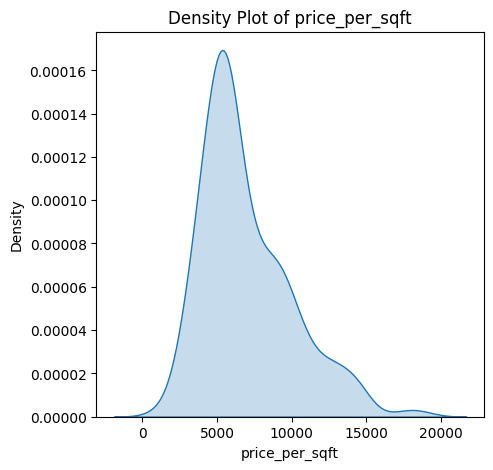

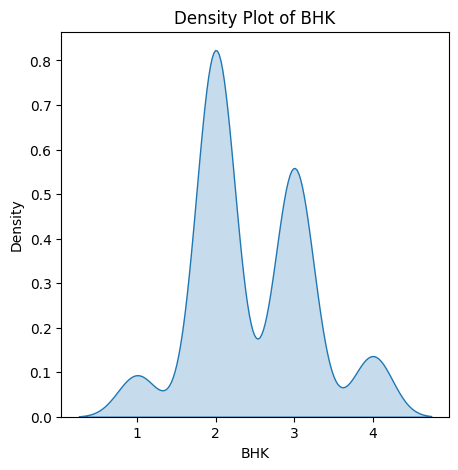

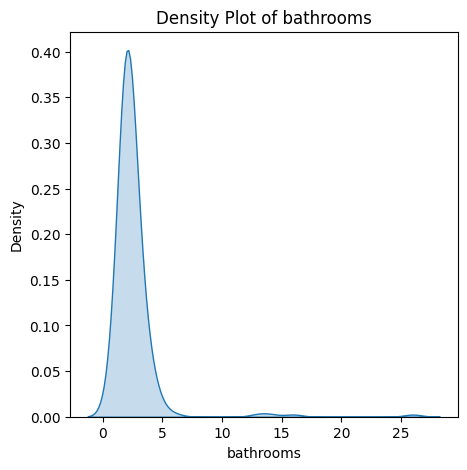

In [110]:
for feature in numerical_features:
    plt.figure(figsize=(5,5))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()
    

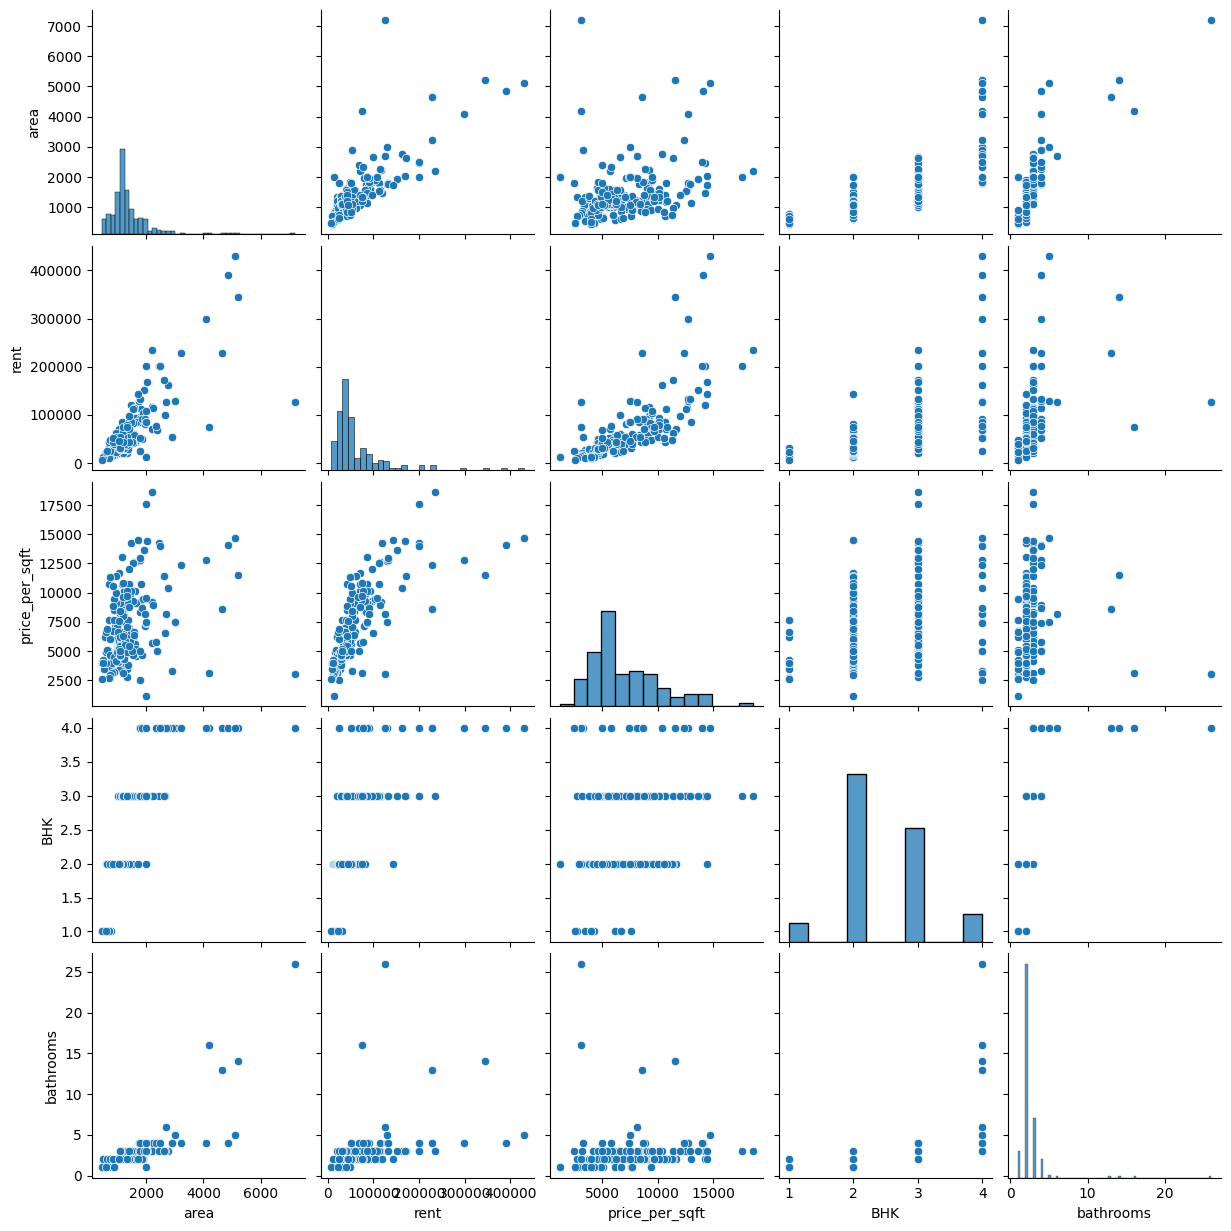

In [111]:
sns.pairplot(df[numerical_features])
plt.show()